# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering.

## Instructions
  - For each question you need to write the sub-problem formulation in markdown.
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [ ]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
import matplotlib

     |████████████████████████████████| 13.0MB 297kB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.0.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1


# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



In [ ]:
def distance_cal(X,Y):
    #need to check this later
    sigma = 0.1
    numer = np.inner(X-Y,X-Y)
    denom = 2*sigma*sigma
    return np.exp(-numer/denom)

def inverse_square(Mat):
    LT = np.sqrt(Mat)
    return np.linalg.inv(LT+0.0005*np.matrix(np.identity(len(LT))))

def spectral_clustering(X):
    """Args:
        X: numpy.array [num_samples, input_dim]

       Returns:
        Y_pred: numpy.array [num_samples]
          array of cluster labels
    """
    #Define Affinity matrix
    A = np.zeros((len(X),len(X)),dtype=float)
    for i in range(len(A)):
        for j in range(len(A[i])):
            if i == j:
                A[i][j] = 0
            else:
                A[i][j] = distance_cal(X[i],X[j])

    #Calculate D matrix and D^-1/2
    D = np.diag(A.sum(axis=1))
    D_normal = inverse_square(D)

    #Normalized Matrix B = D^-1/2 A D^-1/2 which is equal to (I - Laplacian of the graph)
    B = np.matmul(D_normal,np.matmul(A,D_normal))
    #Calculate eigenvectors of L
    eigval,eigvec = np.linalg.eig(B)
    #idx = eigval.argsort()[-k:][::-1]
    k = 2
    #sort eigenvalues from largest to smallest and selecting only k eigenvalues
    eigvec = np.real(eigvec[:,eigval.argsort()[-k:][::-1]])
    eigval = eigval[eigval.argsort()[-k:][::-1]]

    #Normalizing each row of the matrix eigvec
    eigvec_norm = normalize(eigvec, axis=1, norm='l2')

    #Running K-Means on these k eigen vectors
    kmeans = sklearn.cluster.KMeans(n_clusters=k)
    kmeans.fit(eigvec_norm[:])

    Y_pred = kmeans.labels_

    return Y_pred

## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [ ]:
# DO NOT EDIT

from sklearn.datasets import make_circles

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

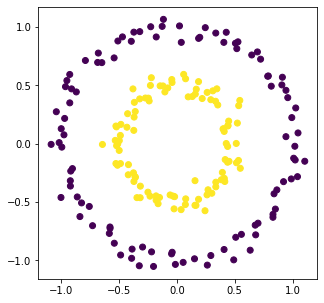

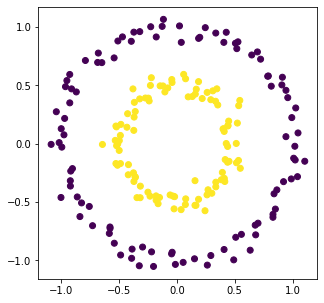

In [ ]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)

import matplotlib.pyplot as plt

def cluster_plot(X,Y):
    plt.figure(figsize=(5,5))
    plt.scatter(X[:,0], X[:,1], c=Y.astype(float))

CY_pred = spectral_clustering(CX)

cluster_plot(CX,CY)
cluster_plot(CX,CY_pred)

## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [ ]:
# Part 3: Report the accuracy of clustering

accuracy = 0
for i in range(len(CX)):
    if CY_pred[i] == CY[i]:
        accuracy += 1

print(accuracy/len(CX)*100)

100.0




---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

In [ ]:
# # Part 1: MDS

# def MDS(X, k, output_dim=2):
#   """Args:
#     X: numpy.array [n_samples, input_dim]
#     k: number of nearest neighbours to construct the knn graph
#     output_dim: dimension of output data

#     Returns:
#     Y: numpy.array [n_samples, output_dim]
#   """
#   # Your code here
#   return Y


# Part 1: MDS
def MDS(X, k, output_dim=2):
    """Args:
        X: numpy.array [n_samples, input_dim]
        k: number of nearest neighbours to construct the knn graph
        output_dim: dimension of output data

        Returns:
        Y: numpy.array [n_samples, output_dim]
    """
    D = sklearn.metrics.pairwise_distances(X, metric="euclidean")**2


    J = np.matrix(np.identity(len(X)))
    J -= (np.ones([len(X),len(X)])/len(X))
    dj = np.matmul(D,J)
    B = -np.matmul(J,dj)/2

    eigval,eigvec = np.linalg.eig(B)
    eigvec = eigvec[:,eigval.argsort()[-output_dim:][::-1]]
    eigval = eigval[eigval.argsort()[-output_dim:][::-1]]

    tau = np.diag(eigval)
    Y = np.matmul(eigvec,np.linalg.inv(np.sqrt(tau)))
    Y = np.real(Y)

    return Y

## Part 2: LLE
Implement Locally Linear Embedding function

In [ ]:
from sklearn.neighbors import NearestNeighbors, kneighbors_graph

def LLE(X, k, output_dim=2):
    """Args:
        X: numpy.array [n_samples, input_dim]
        k: number of nearest neighbours to construct the knn graph
        output_dim: dimension of output data

       Returns:
        Y: numpy.array [n_samples, output_dim]
    """
    neighbors = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(X)
    _,indices = neighbors.kneighbors(X)

    W = np.zeros((len(X),len(X)),dtype=float)
    for i in range(len(X)):
        Z = np.array([ X[indices[i][j]] for j in range(1, len(indices[i]) )])
        for j in range(len(Z)):
            Z[j] -= X[i]
        Cov = np.matmul(Z,np.transpose(Z))
        if np.linalg.det(Cov) == 0:
            Cov += 0.0005 * np.matrix(np.identity(k))
        w = np.linalg.solve(Cov,(np.ones((k,),dtype=float)))
        w[:] = w/sum(w)
        for j in range(1,len(indices[i])):
            W[i][indices[i][j]] = w[j-1]

    I = np.matrix(np.identity(len(X)))
    M = np.matmul(np.transpose(I-W),I-W)
    eigval,eigvec = np.linalg.eig(M)
    eigvec = eigvec[:,eigval.argsort()][:,1:output_dim+1]
    eigval = eigval[eigval.argsort()][1:output_dim+1]
    tau = np.diag(eigval)
    Y = np.matmul(-eigvec,np.linalg.inv(np.sqrt(tau)))
    Y = np.real(Y)
    return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

In [ ]:
# Part 3: Isomap
from sklearn.utils.graph_shortest_path import graph_shortest_path

def ISOMAP(X, k, output_dim=2):
    """Args:
        X: numpy.array [n_samples, input_dim]
        k: number of nearest neighbours to construct the knn graph
        output_dim: dimension of output data

       Returns:
        Y: numpy.array [n_samples, output_dim]
    """
    neigh_graph = kneighbors_graph(X, k, mode='distance', include_self='auto')
    shortest_mat = graph_shortest_path(neigh_graph,method='auto',directed=False)
    J = np.matrix(np.identity(len(X)))
    J -= (np.ones([len(X),len(X)])/len(X))
    D = shortest_mat**2
    dj = np.matmul(D,J)
    B = np.matmul(-J,dj)/2
    eigval,eigvec = np.linalg.eig(B)
    eigvec = eigvec[:,eigval.argsort()[-output_dim:][::-1]]
    eigval = eigval[eigval.argsort()[-output_dim:][::-1]]
    tau = np.diag(eigval)
    Y = np.matmul(-eigvec,np.sqrt(tau))
    Y = np.real(Y)
    return Y

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [ ]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

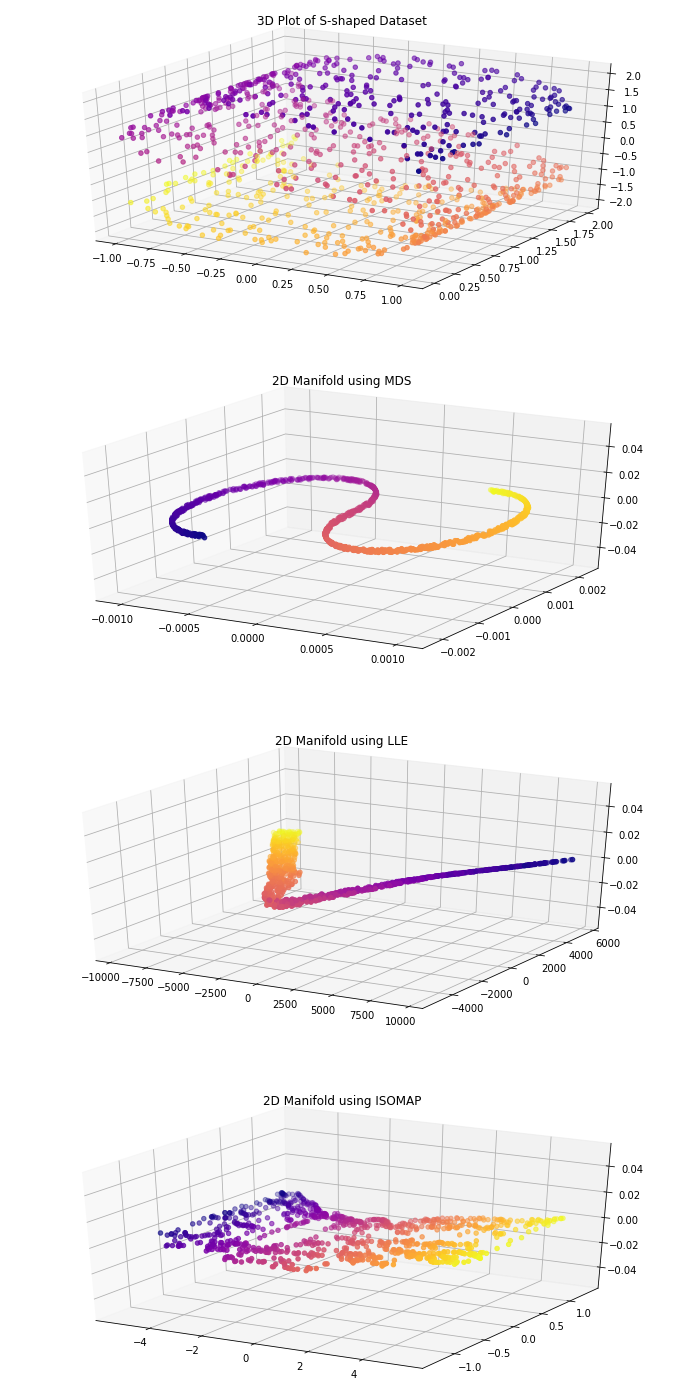

In [ ]:
#  Visualization code here

#  Visualization code here
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

SX_MDS = MDS(SX,5)
SX_LLE = LLE(SX,10)
SX_ISOMAP = ISOMAP(SX,5)

#3D plot
fig = plt.figure()
fig.set_figheight(32)
fig.set_figwidth(12)

ax = fig.add_subplot(511, projection='3d')
ax.set_title("3D Plot of S-shaped Dataset")
p3d = ax.scatter(SX[:,0],SX[:,1],SX[:,2], s=20, c=St, cmap = cm.plasma)

ax_MDS = fig.add_subplot(512, projection='3d')
ax_MDS.set_title("2D Manifold using MDS")
p2d_MDS = ax_MDS.scatter(SX_MDS[:,0],SX_MDS[:,1], s=20, c=St, cmap = cm.plasma)

ax_LLE = fig.add_subplot(513, projection='3d')
ax_LLE.set_title("2D Manifold using LLE")
p2d_LLE = ax_LLE.scatter(SX_LLE[:,0],SX_LLE[:,1],0 ,s=20, c=St, cmap = cm.plasma)

ax_ISO = fig.add_subplot(514, projection='3d')
ax_ISO.set_title("2D Manifold using ISOMAP")
p2d_ISO = ax_ISO.scatter(SX_ISOMAP[:,0],SX_ISOMAP[:,1],0, s=20, c=St, cmap = cm.plasma)

plt.show()



# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [ ]:
# Swiss roll dataset loading here
d = []
with open('./swissroll.dat', 'r') as dat_file:h
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

In [ ]:
from sklearn.cluster import KMeans
def kmeans(x):
    km = KMeans(n_clusters = 2)
    km.fit(x)
    return km.labels_

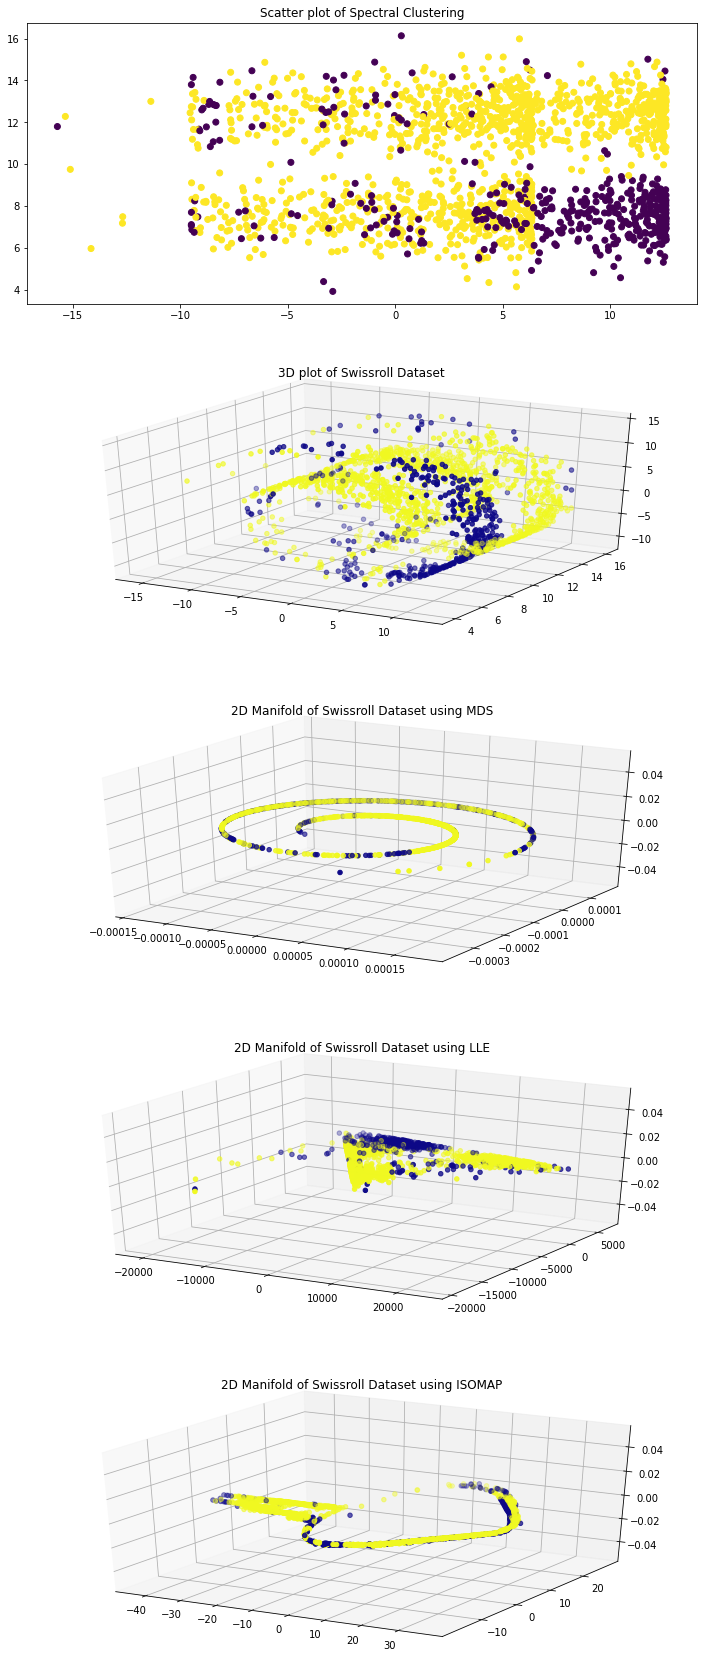

In [ ]:
# CODE HERE

# CODE HERE
swiss_Y = spectral_clustering(swissroll)

# def cluster_plot(X,Y):
#     plt.figure(figsize=(5,5))
#     plt.scatter(X[:,0], X[:,1], c=Y.astype(float))
#     plt.show()

sw_MDS = MDS(swissroll,5)
sw_LLE = LLE(swissroll,30)
sw_ISOMAP = ISOMAP(swissroll,5)

# sx2 = lle(n_components=2)
# sx2 = sx2.fit_transform(swissroll)

fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(12)

ax_spec = fig.add_subplot(511)
ax_spec.set_title("Scatter plot of Spectral Clustering")
s2d_spec = ax_spec.scatter(swissroll[:,0],swissroll[:,1], c=swiss_Y.astype(float))

ax = fig.add_subplot(512, projection='3d')
ax.set_title("3D plot of Swissroll Dataset")
s3d = ax.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2], s=20, c=swiss_Y, cmap = cm.plasma)

ax_MDS = fig.add_subplot(513, projection='3d')
ax_MDS.set_title("2D Manifold of Swissroll Dataset using MDS")
s2d_MDS = ax_MDS.scatter(sw_MDS[:,0],sw_MDS[:,1], s=20, c=swiss_Y, cmap = cm.plasma)

ax_LLE = fig.add_subplot(514, projection='3d')
ax_LLE.set_title("2D Manifold of Swissroll Dataset using LLE")
s2d_LLE = ax_LLE.scatter(sw_LLE[:,0],sw_LLE[:,1], s=20, c=swiss_Y, cmap = cm.plasma)

ax_ISO = fig.add_subplot(515, projection='3d')
ax_ISO.set_title("2D Manifold of Swissroll Dataset using ISOMAP")
s2d_ISO = ax_ISO.scatter(sw_ISOMAP[:,0],sw_ISOMAP[:,1],0, s=20, c=swiss_Y, cmap = cm.plasma)


plt.show()


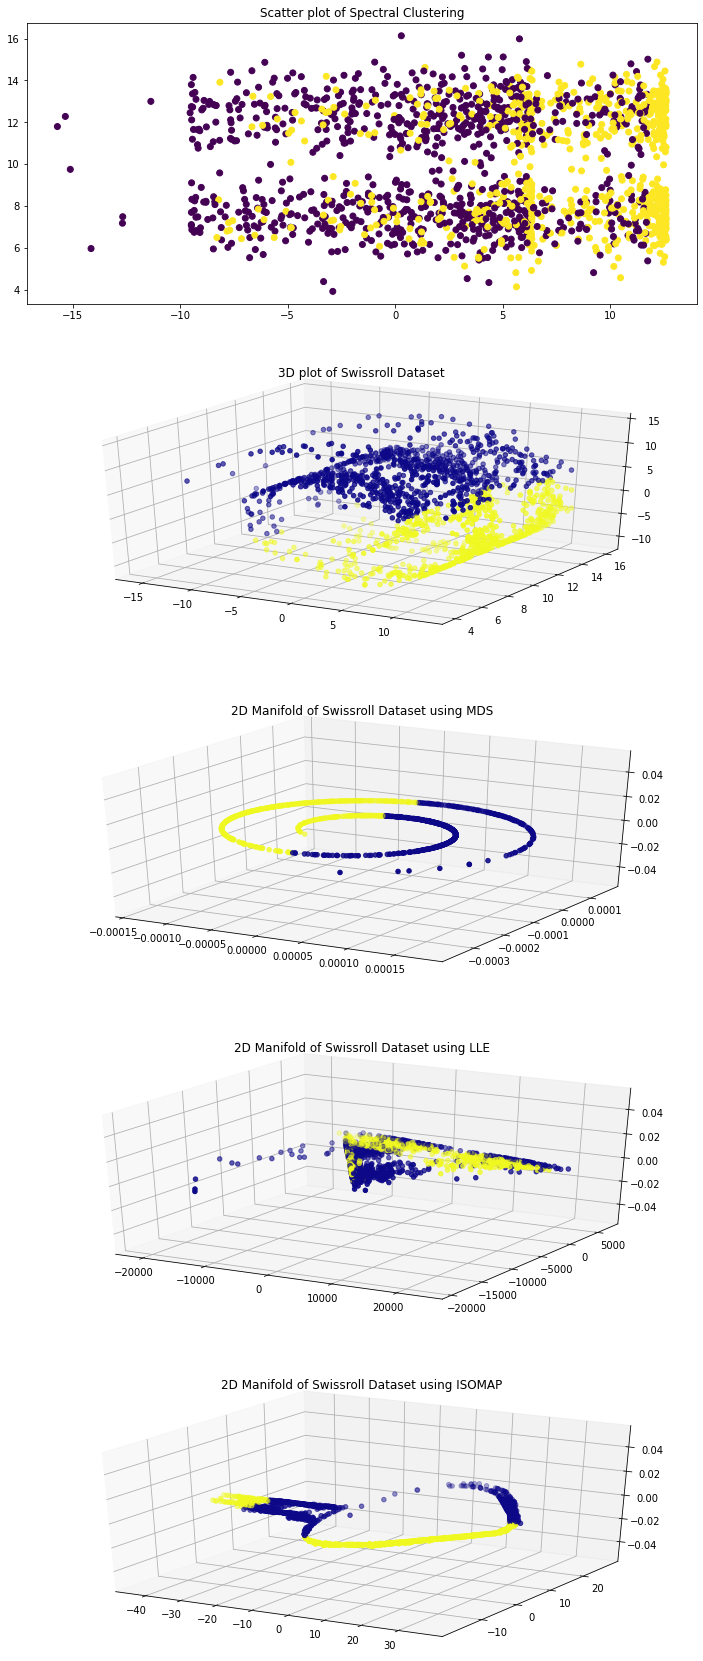

In [ ]:
# CODE HERE

# CODE HERE
swiss_K = kmeans(swissroll)

# def cluster_plot(X,Y):
#     plt.figure(figsize=(5,5))
#     plt.scatter(X[:,0], X[:,1], c=Y.astype(float))
#     plt.show()

sw_MDS = MDS(swissroll,5)
sw_LLE = LLE(swissroll,30)
sw_ISOMAP = ISOMAP(swissroll,5)

# sx2 = lle(n_components=2)
# sx2 = sx2.fit_transform(swissroll)

fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(12)

ax_spec = fig.add_subplot(511)
ax_spec.set_title("Scatter plot of Spectral Clustering")
s2d_spec = ax_spec.scatter(swissroll[:,0],swissroll[:,1], c=swiss_K.astype(float))

ax = fig.add_subplot(512, projection='3d')
ax.set_title("3D plot of Swissroll Dataset")
s3d = ax.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2], s=20, c=swiss_K, cmap = cm.plasma)

ax_MDS = fig.add_subplot(513, projection='3d')
ax_MDS.set_title("2D Manifold of Swissroll Dataset using MDS")
s2d_MDS = ax_MDS.scatter(sw_MDS[:,0],sw_MDS[:,1], s=20, c=swiss_K, cmap = cm.plasma)

ax_LLE = fig.add_subplot(514, projection='3d')
ax_LLE.set_title("2D Manifold of Swissroll Dataset using LLE")
s2d_LLE = ax_LLE.scatter(sw_LLE[:,0],sw_LLE[:,1], s=20, c=swiss_K, cmap = cm.plasma)

ax_ISO = fig.add_subplot(515, projection='3d')
ax_ISO.set_title("2D Manifold of Swissroll Dataset using ISOMAP")
s2d_ISO = ax_ISO.scatter(sw_ISOMAP[:,0],sw_ISOMAP[:,1],0, s=20, c=swiss_K, cmap = cm.plasma)


plt.show()


## Observations

#### Clustering on 3D Swissroll
- Using Spectral clustering, the datapoints are classified along the manifold, giving accurate classification

- Kmeans clustering is not able to give good results as it does not classify the datapoints along the manifold.

- When spectral cluserting is used, classification of datapoints are done along the manifold, giving somewhat good classification.

#### 2D VIsualization of Swissroll Data
- MDS is unable to unroll the swissroll. This happens because the manifold information is being used during dimensionality reduction.
- ISOMAP and LLE are able to find the hole. But as a result, distortion in the unfolding of the set occurs.  
- We can see that Spectral Clustering on the 2D data is able to separate the datapoints along the manifold, showing good results.




---



# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [ ]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

In [ ]:
def reductionUsingPCA(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    pca_X: numpy.array [n_samples, output_dim]
    """
    pca = sklearn.decomposition.PCA(output_dim)
    pca_X = pca.fit_transform(X)
    return pca_X

In [ ]:
def reductionUsingISOMAP(X, k, output_dim):
    """Args:
    X: numpy.array [n_samples, input_dim]
    k: number of nearest neighbours to construct the knn graph
    output_dim: dimension of output data

    Returns:
    isomap_X: numpy.array [n_samples, output_dim]
    """
    embedding = sklearn.manifold.Isomap(n_neighbors=k, n_components=output_dim)
    isomap_X = embedding.fit_transform(X)
    return isomap_X

In [ ]:
def classification(X_train, y_train, X_test, n_classes):
    """Args:
    X: numpy.array [n_samples, input_dim]
    n_classes: number of classes

    Returns:
    labels: numpy_array [n_samples]
    """
    svm = sklearn.svm.SVC(kernel = 'poly', C = 1.0).fit(X_train, y_train)
    labels = svm.predict(X_test)

    return labels


In [ ]:
def F1_score(y_true, y_pred):
    """Args:
    y_true: numpy.array [n_samples] , ground truth value
    y_pred: numpy.array [n_samples] , predicted value by classifier

    Returns:
    score: float, f1-score
    """
    score = sklearn.metrics.f1_score(y_true, y_pred,average='micro')
    return score

In [ ]:
X_combined = np.vstack((X_train, X_test))
X_pca = reductionUsingPCA(X_combined,5,100)
X_train_pca = X_pca[:5000,:]
X_test_pca = X_pca[5000:,:]
labels_pca = classification(X_train_pca,y_train, X_test_pca,10)
print("PCA score for output dimension 100: ", F1_score(y_test,labels_pca))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PCA score for output dimension 100:  0.343


In [ ]:
X_isomap = reductionUsingISOMAP(X_combined,5,100)
X_train_isomap = X_isomap[:5000,:]
X_test_isomap = X_isomap[5000:,:]
labels_isomap = classification(X_train_isomap,y_train, X_test_isomap,10)
print("ISOMAP score for output dimension 100: ", F1_score(y_test,labels_isomap))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ISOMAP score for output dimension 100:  0.283


In [ ]:
X_combined = np.vstack((X_train, X_test))
X_pca = reductionUsingPCA(X_combined,5,500)
X_train_pca = X_pca[:5000,:]
X_test_pca = X_pca[5000:,:]
labels_pca = classification(X_train_pca,y_train, X_test_pca,10)
print("PCA score for output dimension 500: ", F1_score(y_test,labels_pca))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PCA score for output dimension 500:  0.335


In [ ]:
X_isomap = reductionUsingISOMAP(X_combined,5,500)
X_train_isomap = X_isomap[:5000,:]
X_test_isomap = X_isomap[5000:,:]
labels_isomap = classification(X_train_isomap,y_train, X_test_isomap,10)
print("ISOMAP score for output dimension 500: ", F1_score(y_test,labels_isomap))

## Observations
- Dimensions were reduced to 100 and 500. For both the cases, the F1 score for PCA was better than that for ISOMAP.
- This was expected, since ISOMAP does dimensionality reduction in such a way that the data in lower dimension is very similar to the data in higher dimension when visualized.
- PCA performs better than ISOMAP in classification tasks, as it can better preserve the inter-class variance.
- Another reason can be that CIFAR-10 doesn't lie on the manifold and thus, ISOMAP is of not much use.
- When the output dimesnions are changed from 100 to 500, we can see that the F1 score for PCA increases, as the reconstruction error for higher dimesnions is lesser than that for lower dimesnions.
